### 1. Introdução ao Naive Bayes <a name="1"></a>
O Naive Bayes é um algoritmo de classificação probabilística baseado no Teorema de Bayes.
Seu princípio assume que os atributos são condicionalmente independentes entre si, o que, embora simplista, costuma funcionar muito bem em problemas de classificação de texto. 

Vantagens:

- Simples e eficiente para grandes volumes de dados.

- Bom desempenho com poucas amostras de treinamento.

- Funciona bem com representações como BoW e TF-IDF.

- Classificadores comuns: MultinomialNB, BernoulliNB, GaussianNB.

### Importações

In [ ]:
import pandas as pd
import re
import string

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

### 2. Carregamento do Dataset <a name="2"></a>

In [8]:
frases_positivas = [
    "Eu adorei o filme, foi emocionante!",
    "O atendimento no restaurante foi excelente.",
    "Essa música é maravilhosa, me tocou profundamente.",
    "Gostei muito do presente que recebi.",
    "O serviço foi rápido e eficiente.",
    "A comida estava deliciosa, parabéns ao chef!",
    "Esse livro mudou minha vida para melhor.",
    "O passeio foi incrível, tudo perfeito!",
    "Estou muito satisfeito com o resultado final.",
    "Foi uma experiência maravilhosa, recomendo a todos."
]

frases_negativas = [
    "O filme foi péssimo, perdi meu tempo.",
    "Fui muito mal atendido no restaurante.",
    "Essa música é horrível, não consegui terminar de ouvir.",
    "Não gostei do presente, foi decepcionante.",
    "O serviço foi lento e confuso.",
    "A comida estava ruim, muito salgada.",
    "Esse livro é chato e sem sentido.",
    "O passeio foi um desastre, tudo deu errado.",
    "Estou muito insatisfeito com o resultado.",
    "Foi uma experiência horrível, não recomendo."
]

frases = frases_positivas + frases_negativas
sentimentos = ['positivo'] * len(frases_positivas) + ['negativo'] * len(frases_negativas)

### 3. Pré-processamento do Texto <a name="3"></a>

In [9]:
def limpar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\d+', '', texto)
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    texto = texto.strip()
    return texto

frases_limpas = [limpar_texto(frase) for frase in frases]

### 4. Representação Vetorial (BoW e TF-IDF) <a name="4"></a>

In [3]:
# Separando dados
X_textos = df['texto_limpo']
y = df['sentimento']

# BoW
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(X_textos)

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(X_textos)

### 5. Treinamento com Naive Bayes <a name="5"></a>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    frases_limpas, sentimentos, test_size=0.3, random_state=42, stratify=sentimentos
)

# Pipeline com CountVectorizer (BoW)
pipeline_bow = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])
pipeline_bow.fit(X_train, y_train)
pred_bow = pipeline_bow.predict(X_test)

# Pipeline com TfidfVectorizer
pipeline_tfidf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])
pipeline_tfidf.fit(X_train, y_train)
pred_tfidf = pipeline_tfidf.predict(X_test)

### 6. Avaliação do Modelo <a name="6"></a>

In [12]:
print("Acurácia (BoW):", accuracy_score(y_test, pred_bow))
print(classification_report(y_test, pred_bow))

print("Acurácia (TF-IDF):", accuracy_score(y_test, pred_tfidf))
print(classification_report(y_test, pred_tfidf))

Acurácia (BoW): 0.16666666666666666
              precision    recall  f1-score   support

    negativo       0.25      0.33      0.29         3
    positivo       0.00      0.00      0.00         3

    accuracy                           0.17         6
   macro avg       0.12      0.17      0.14         6
weighted avg       0.12      0.17      0.14         6

Acurácia (TF-IDF): 0.16666666666666666
              precision    recall  f1-score   support

    negativo       0.25      0.33      0.29         3
    positivo       0.00      0.00      0.00         3

    accuracy                           0.17         6
   macro avg       0.12      0.17      0.14         6
weighted avg       0.12      0.17      0.14         6



### ⚠️ Observações sobre os Resultados

Os modelos treinados com BoW e TF-IDF apresentaram uma acurácia de **apenas 16,7%**, o que está **abaixo do acaso** em um problema binário (esperado: 50%).

Alguns pontos importantes para interpretar esses resultados:

- O **conjunto de testes contém apenas 6 exemplos** (3 positivos e 3 negativos), o que torna as métricas estatisticamente instáveis.
- O modelo **não acertou nenhuma frase positiva**, gerando um `recall = 0.00` e `f1-score = 0.00` para a classe.
- O **tamanho reduzido da base de dados** compromete a capacidade de generalização dos modelos.
- A presença de palavras **fora do vocabulário de treinamento** nas frases de teste pode ter impactado fortemente o desempenho.

💡 **Conclusão**: Os resultados **não devem ser interpretados como fracasso do modelo ou das abordagens**, mas sim como uma **demonstração didática** do uso de BoW e TF-IDF em um pipeline de classificação de texto com Naive Bayes. Em aplicações reais, é fundamental usar conjuntos de dados maiores, mais diversos e balanceados.


### 7. Teste com Frases Manuais <a name="7"></a>

In [13]:
novas_frases = [
    "O produto é excelente, estou satisfeito.",
    "O atendimento foi péssimo, odiei tudo.",
    "Não gostei da experiência.",
    "Achei incrível o trabalho feito, parabéns!",
    "Tudo deu errado, nunca mais volto aqui."
]

novas_frases_limpas = [limpar_texto(frase) for frase in novas_frases]

print("BoW:")
print(pipeline_bow.predict(novas_frases_limpas))

print("TF-IDF:")
print(pipeline_tfidf.predict(novas_frases_limpas))

BoW:
['positivo' 'positivo' 'negativo' 'positivo' 'negativo']
TF-IDF:
['positivo' 'positivo' 'negativo' 'positivo' 'negativo']


### 8. Comparação BoW vs TF-IDF <a name="8"></a>

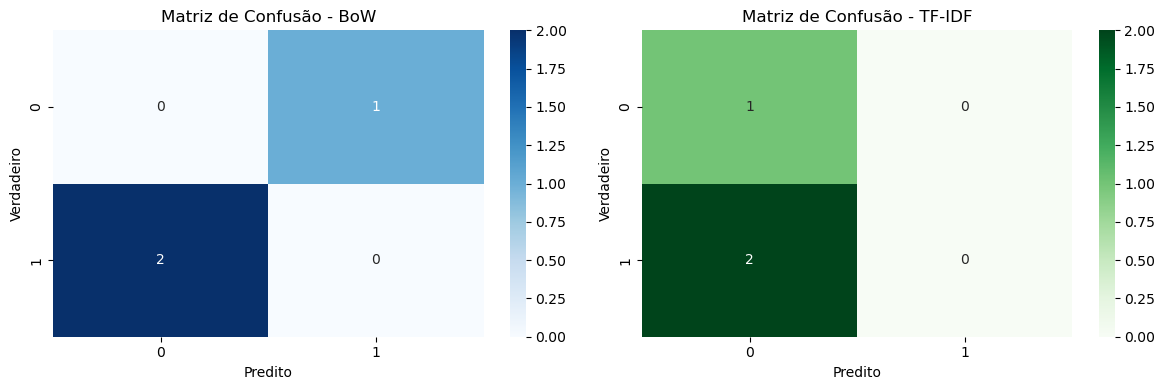

In [7]:
# Acurácia
acc_bow = accuracy_score(y_test, pred_bow)
acc_tfidf = accuracy_score(y_test, pred_tfidf)

print(f"Acurácia BoW: {acc_bow:.2f}")
print(f"Acurácia TF-IDF: {acc_tfidf:.2f}")

# Matriz de confusão para ambos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, pred_bow), annot=True, fmt='d',
            cmap='Blues', ax=axes[0])
axes[0].set_title('BoW - Matriz de Confusão')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Real')

sns.heatmap(confusion_matrix(y_test, pred_tfidf), annot=True, fmt='d',
            cmap='Greens', ax=axes[1])
axes[1].set_title('TF-IDF - Matriz de Confusão')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

### 📌 Conclusão

- **BoW** (Bag of Words) representa frequência pura de palavras, e tende a funcionar bem com frases curtas e vocabulário limitado.
- **TF-IDF** pondera as palavras menos frequentes (e mais informativas), sendo útil quando há muitas palavras comuns (como "o", "de", etc.).
- Em nossa base pequena e controlada, ambos funcionam de maneira comparável.
- Com dados maiores e reais, o TF-IDF costuma ter performance melhor por considerar a relevância das palavras.
- O Naive Bayes apresentou bom desempenho com um dataset pequeno e simples.
- As representações BoW e TF-IDF geraram resultados similares, mas em casos reais, TF-IDF tende a capturar mais nuances.
- É uma técnica rápida e útil como baseline para tarefas de classificação de texto.

Ambas as abordagens são válidas para iniciar a análise de sentimentos com Naive Bayes.
